# Importing The Libraries

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [162]:
pd.set_option('display.max_columns', None)

## Meta Data

- Employeid: Unique ID of an Employee
- Name: Name of the employee
- Gender:  Gender of the employee
- Age: Age of an employe (in years)
- MaritalStatus: Marital Status of the Employee( Married/ Single/ Divorced etc)
- Turnover: Retention rate of an employee
- Traveling: Whether traveling is required in job role of an employee
- Vertical: In which department employee is working
- Qualifications: How many qualifications does an employee have
- Education: Qualifications are in which field (Medical/marketing/technical etc)
- Satisfaction: How much employee is satisfied in his/her role (1 minimum and 5 maximum)
- Engagement: How much engagement is required for the role (1 minimum and 5 maximum)
- Level: Level of the job( 1 being entry level and 5 means top management)
- Role: What is the employee role in the organization (Technician/Manager/HR etc)
- Daily: Daily wages of the employees
- Hour:  Hours wages of the employees
- Monthly: Monthly wages of the employee
- MonthlyRate: Total salary paid to the employee
- Work Experience: Total experience of the employee
- OverTime: Whether an employee have done overtime or not
- SalaryHike: Last salary increment in percentage
- Last Rating: Last financial year performance
- Hours: Working hours of an Employee
- TrainingTimesLastYear: Training completed by an employee in last year
- Work&Life: balance between work and life (1 minimum and 5 maximum)
- YearsAtCompany: Years employee is working with the current organization
- YearsInCurrentRole: Years employee working at current designation
- YearsSinceLastPromotion: When was last promoted
- YearsWithCurrentManager: How long employee has been working with Current manager
- DistanceFromHome: Distance between office and employee home

In [163]:
data = pd.read_csv('Cleaned_data_Ideaspice.csv')

In [164]:
df =data.copy()

In [165]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [166]:
df.head()

,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Turnover,Qualifications,Satisfaction,Engagement,Level,Daily,Hour,Monthly,MonthlyRate,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0,2,2,2,3,7,1,40,0,3,4,2,2,129,97,6287,4984,1,23,4,1,3,13,8,4,1,2
1,1,1,1,2,2,7,0,46,0,4,4,3,2,134,64,4866,24079,9,18,3,2,3,8,7,7,7,23
2,0,2,2,1,3,5,1,49,0,3,4,3,4,934,82,19833,25706,5,14,3,2,4,7,7,0,7,13
3,1,1,2,1,1,0,0,29,0,5,4,3,3,1201,32,7854,3642,1,19,3,3,2,10,9,1,8,13
4,0,1,2,1,3,5,0,54,0,3,1,1,4,1478,42,18731,13254,2,13,3,3,3,6,2,0,1,1


### Categorization of features into numerical and continuous

In [167]:
num_features = [feature for feature in df.columns if df[feature].dtypes != 'O']


In [168]:
for feature in num_features:
    print(f'{feature} have {df[feature].nunique()} category ----- {df[feature].unique()} ')

Gender have 2 category ----- [0 1] 
MaritalStatus have 3 category ----- [2 1 0] 
Travelling have 3 category ----- [2 1 0] 
Vertical have 3 category ----- [2 1 0] 
Education have 6 category ----- [3 2 1 0 5 4] 
Role have 9 category ----- [7 5 0 6 1 4 3 8 2] 
OverTime have 2 category ----- [1 0] 
Age have 42 category ----- [40 46 49 29 54 33 35 25 27 32 41 31 36 51 42 30 34 44 22 39 50 56 38 48
 45 37 21 24 18 23 26 55 28 52 47 43 19 57 59 58 20 53] 
Turnover have 2 category ----- [0 1] 
Qualifications have 5 category ----- [3 4 5 1 2] 
Satisfaction have 4 category ----- [4 1 3 2] 
Engagement have 4 category ----- [2 3 1 4] 
Level have 5 category ----- [2 4 3 5 1] 
Daily have 889 category ----- [ 129  134  934 1201 1478 1169 1378  541 1112  156  755 1299  558  791
  890  141  468 1032  842 1003 1225  978 1055  453  535 1252  122  207
  261 1490 1327 1315  142  637  230  794  503  403  688  533  111  693
  618  927  167 1287  907  109  880  653  452  600  510  231  697 1151
  320  115  38

In [169]:
cont_features = []
num_cat_features =[]
for feature in num_features:
    if df[feature].nunique() > 7 :
        cont_features.append(feature)
    else:
        num_cat_features.append(feature)
print(cont_features)


['Role', 'Age', 'Daily', 'Hour', 'Monthly', 'MonthlyRate', 'Work Experience', 'SalaryHike', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrentManager', 'DistanceFromHome']


### finding outlires with IQR

In [170]:


def iqr_outliers_(df):
    outliers = []
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5 * iqr
    upper_tail = q3 + 1.5 * iqr
    for i, value in enumerate(df):
        if value > upper_tail or value < lower_tail:
            outliers.append(i)
    print("Outlier Indices:", outliers)
    return(outliers)

In [171]:
#### to replace outliers using iqr

def iqr_outliers(df):
    
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    med = np.median(df)
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            df = df.replace(i, med)


## Univariate analysis 


Gender
0    817
1    653
Name: Gender, dtype: int64


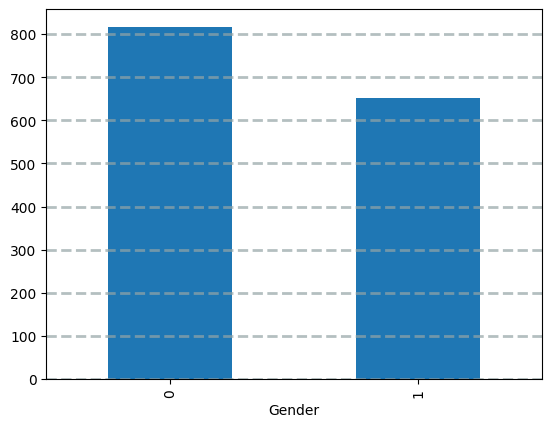

MaritalStatus
0    349
1    659
2    462
Name: MaritalStatus, dtype: int64


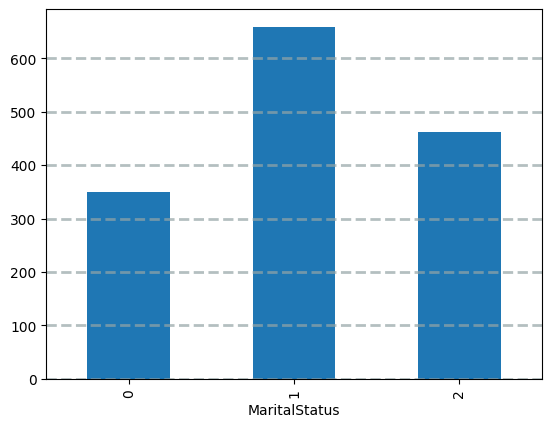

Travelling
0    304
1    167
2    999
Name: Travelling, dtype: int64


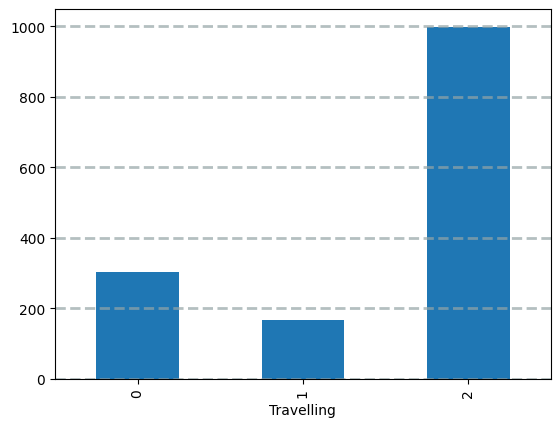

Vertical
0     64
1    965
2    441
Name: Vertical, dtype: int64


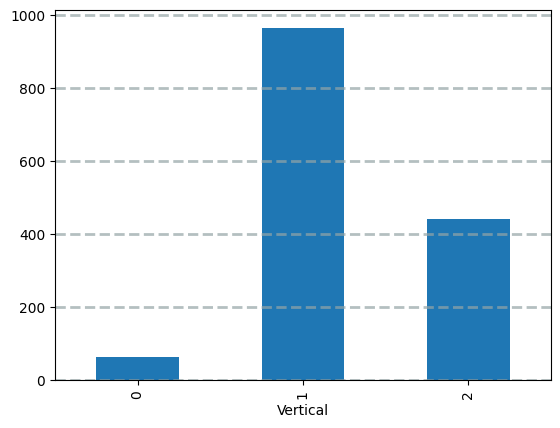

Education
0     23
1    603
2    158
3    465
4     95
5    126
Name: Education, dtype: int64


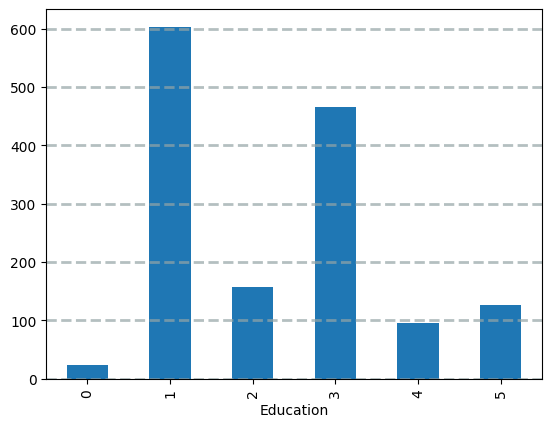

OverTime
0    1069
1     401
Name: OverTime, dtype: int64


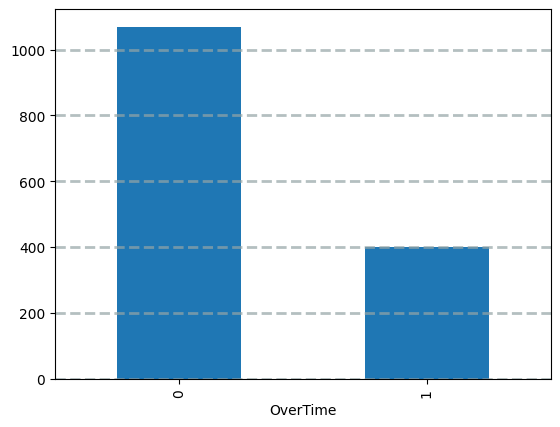

Turnover
0    1203
1     267
Name: Turnover, dtype: int64


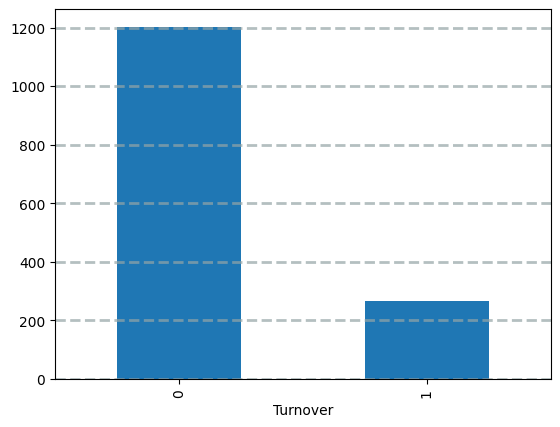

Qualifications
1    180
2    284
3    585
4    380
5     41
Name: Qualifications, dtype: int64


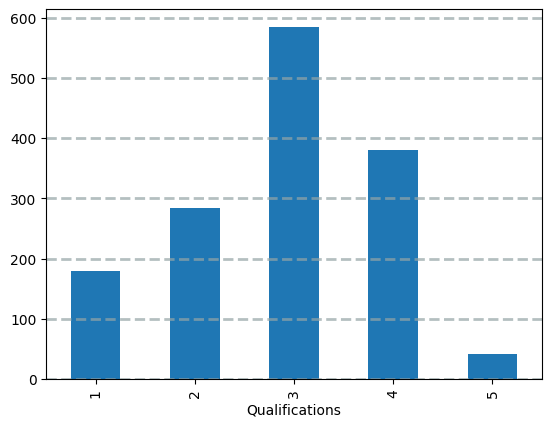

Satisfaction
1    300
2    265
3    478
4    427
Name: Satisfaction, dtype: int64


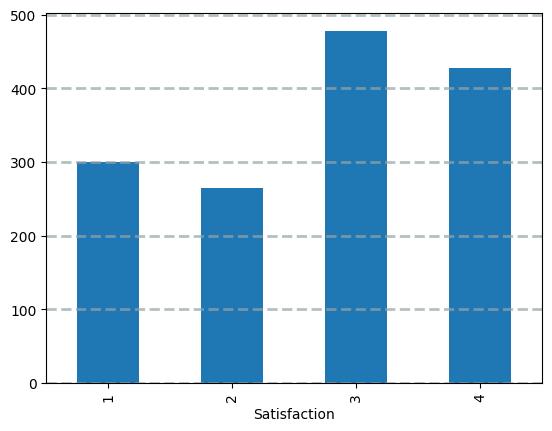

Engagement
1     96
2    377
3    851
4    146
Name: Engagement, dtype: int64


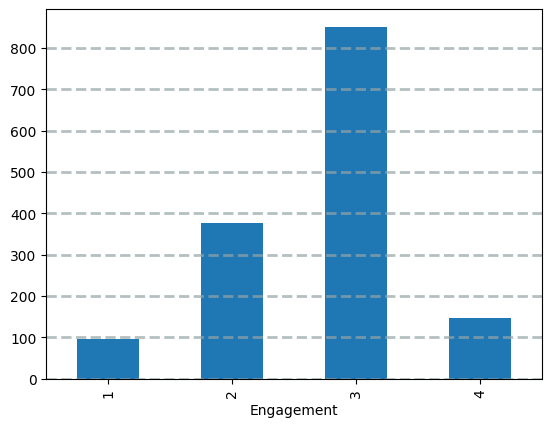

Level
1    538
2    511
3    239
4    119
5     63
Name: Level, dtype: int64


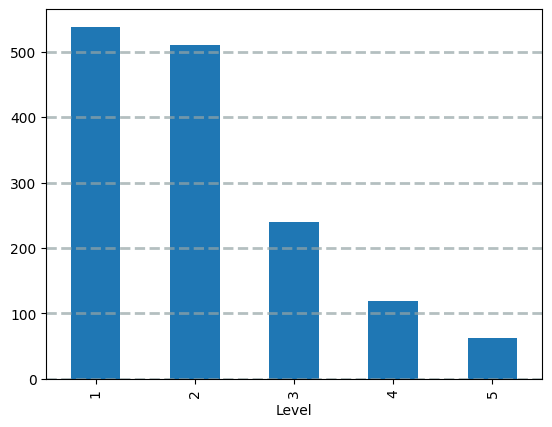

Last Rating
3    1231
4     239
Name: Last Rating, dtype: int64


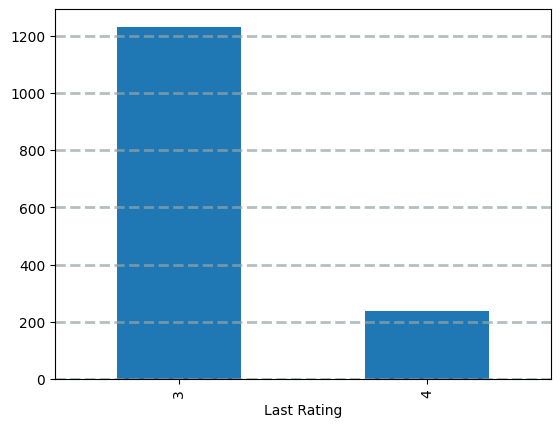

TrainingTimesLastYear
0     61
1     72
2    610
3    409
4    115
5    126
6     77
Name: TrainingTimesLastYear, dtype: int64


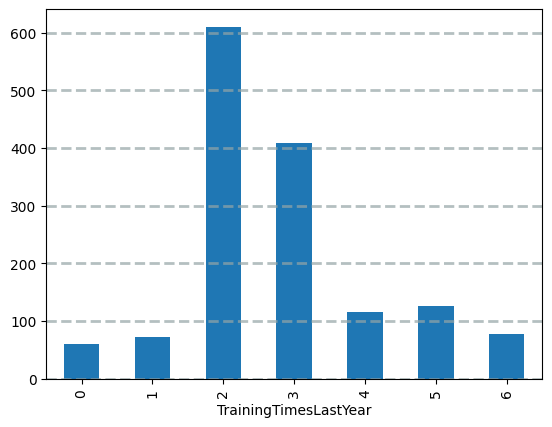

Work&Life
1     78
2    319
3    894
4    179
Name: Work&Life, dtype: int64


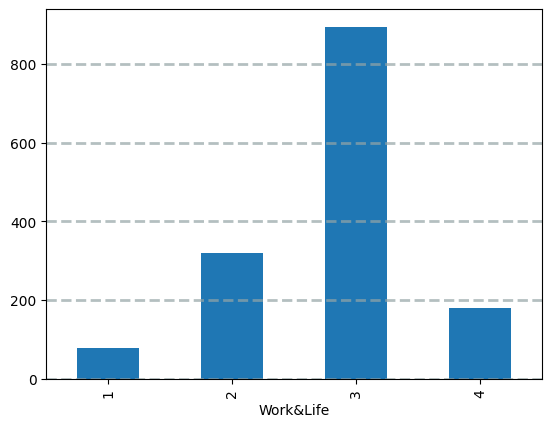

In [172]:
for feature in num_cat_features:
    df.groupby(feature)[feature].count().plot.bar()
    print(df.groupby(feature)[feature].count())
    plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
    plt.show()


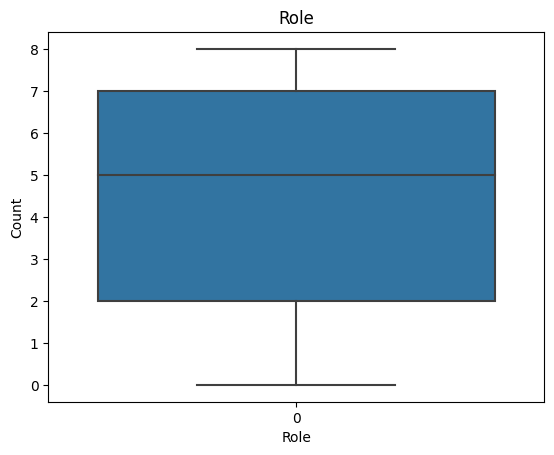

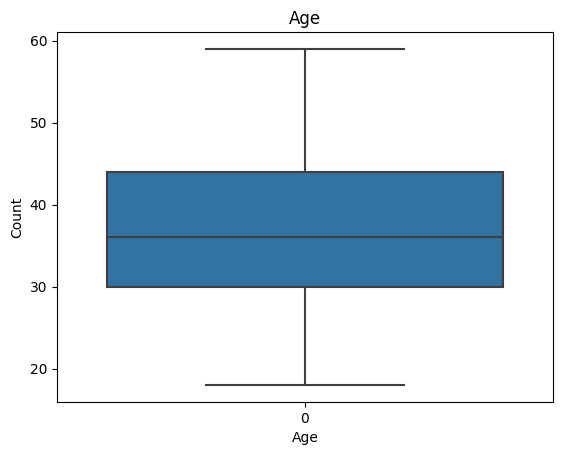

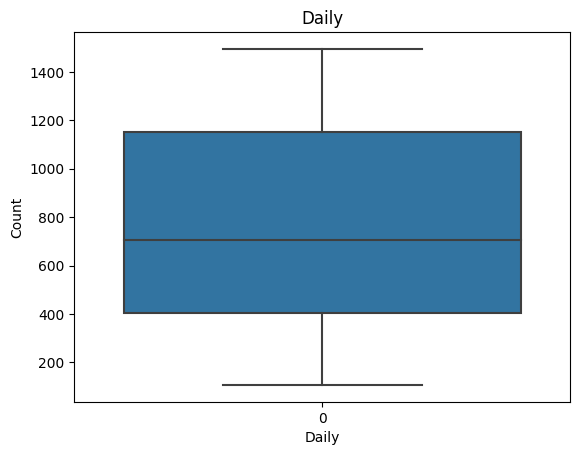

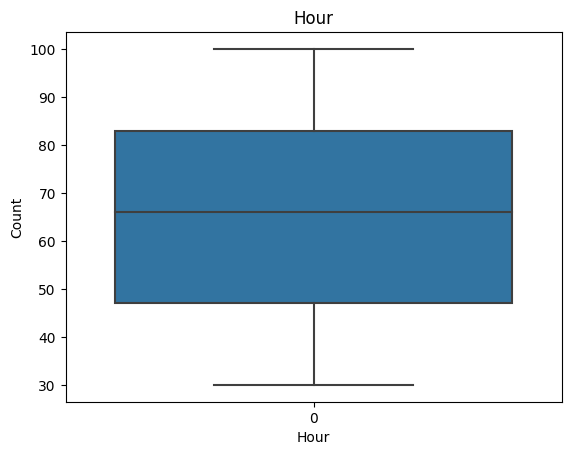

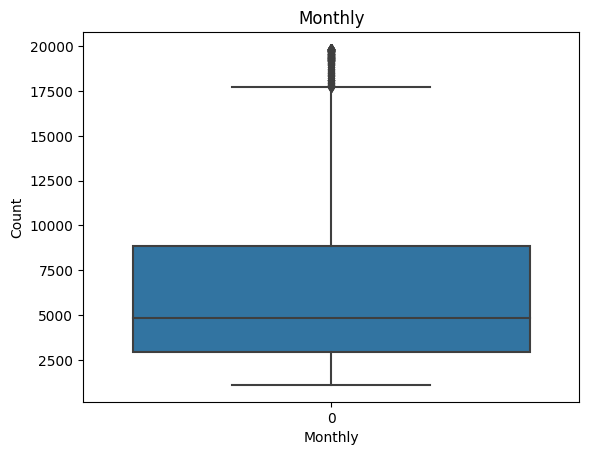

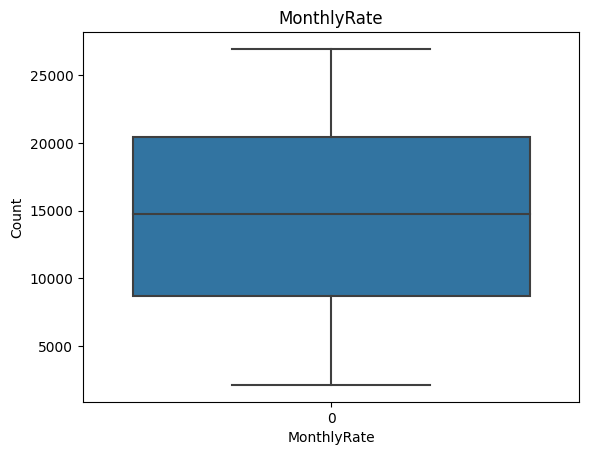

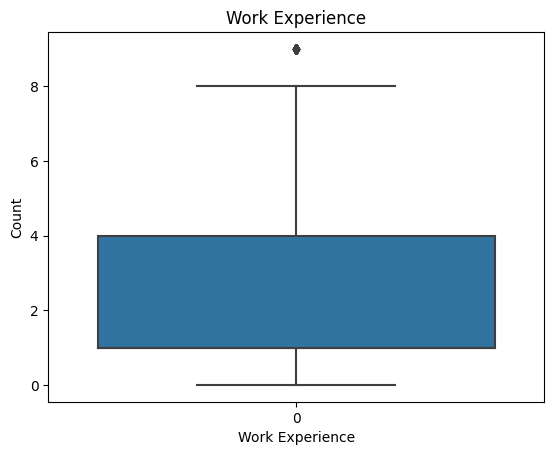

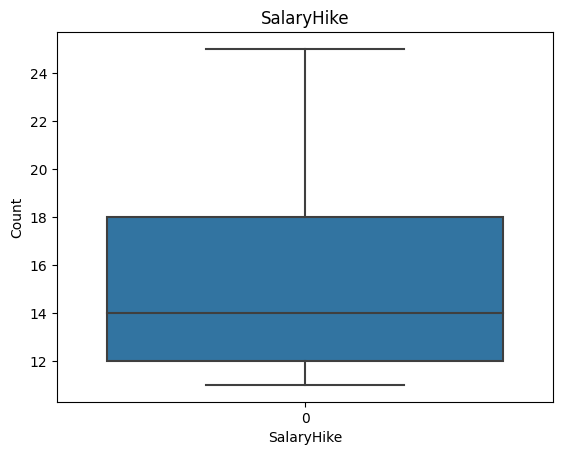

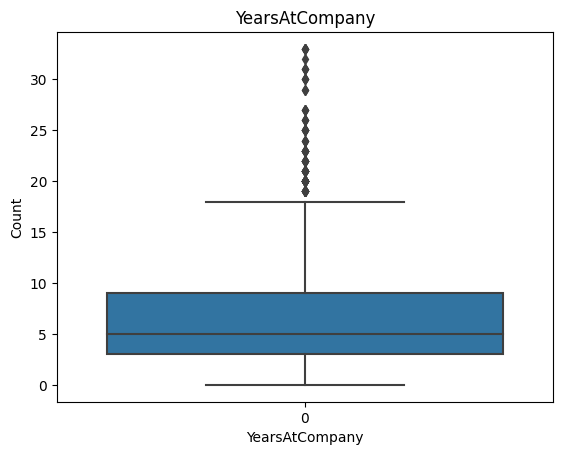

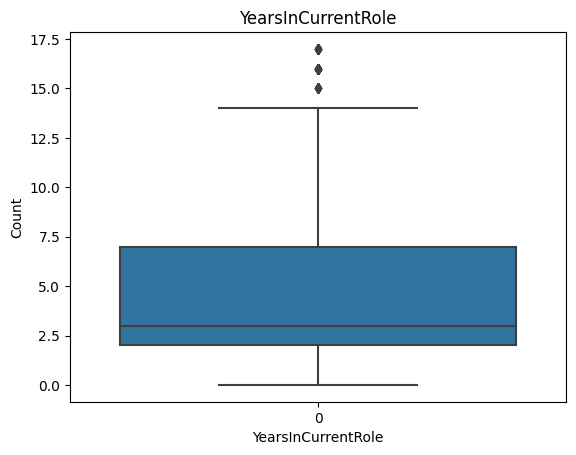

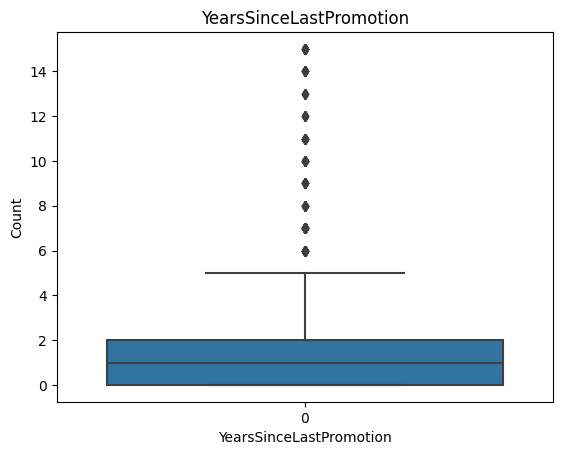

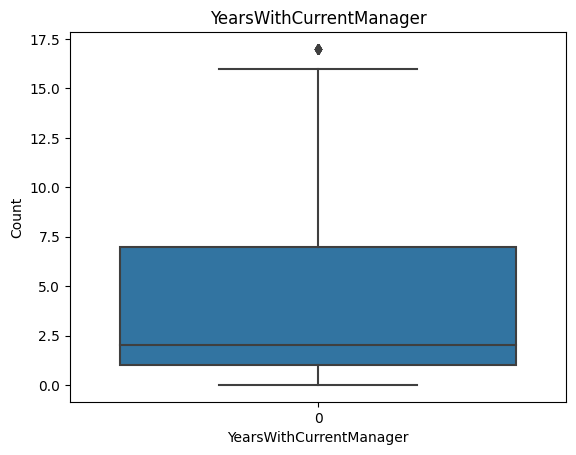

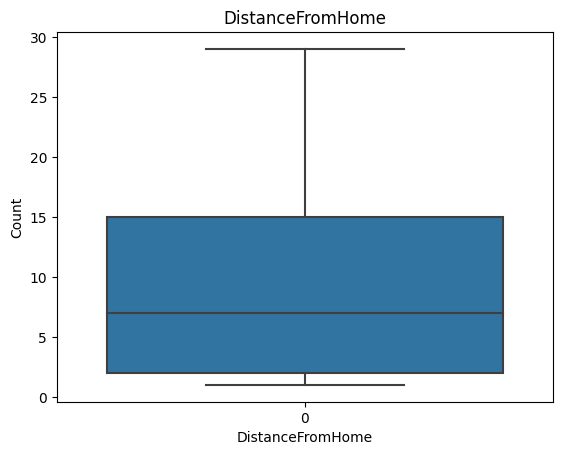

In [173]:
for feature in cont_features:
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [174]:
df.iloc[iqr_outliers_(df['Work Experience'])]

Outlier Indices: [1, 159, 162, 251, 270, 288, 292, 309, 328, 343, 392, 435, 444, 466, 484, 514, 516, 526, 529, 535, 541, 562, 618, 622, 642, 668, 677, 681, 699, 715, 728, 813, 814, 817, 823, 884, 885, 913, 1007, 1056, 1059, 1121, 1174, 1182, 1223, 1227, 1254, 1262, 1271, 1280, 1286, 1333, 1338, 1373, 1417, 1419, 1432]


,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Turnover,Qualifications,Satisfaction,Engagement,Level,Daily,Hour,Monthly,MonthlyRate,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
1,1,1,1,2,2,7,0,46,0,4,4,3,2,134,64,4866,24079,9,18,3,2,3,8,7,7,7,23
159,1,0,2,1,0,5,1,41,0,4,3,3,4,951,80,13367,20867,9,13,3,2,3,7,7,0,4,17
162,1,0,1,1,1,2,1,31,1,4,2,4,1,1216,45,3821,9972,9,17,3,4,4,9,7,0,7,7
251,0,2,2,1,1,6,1,51,0,4,2,2,2,990,64,5307,16778,9,20,4,3,2,6,1,0,3,1
270,1,2,2,0,3,5,1,48,0,3,1,3,3,667,67,13737,5255,9,14,3,5,3,5,2,0,3,29
288,1,1,0,1,5,2,0,33,0,3,1,2,3,669,52,3889,12534,9,12,3,3,3,3,2,0,2,4
292,1,2,0,2,1,7,1,40,1,3,4,3,2,845,63,4547,16391,9,13,3,2,3,3,2,3,2,25
309,0,1,2,1,3,3,1,49,0,3,2,3,4,1264,63,16860,13257,9,14,3,3,3,10,9,5,7,13
328,1,0,2,1,1,6,0,40,0,4,4,4,2,1372,73,5300,3521,9,18,3,3,3,7,7,1,2,3
343,1,1,2,1,1,4,0,34,0,3,3,3,3,1325,73,10170,24509,9,13,3,2,3,9,7,1,2,1


In [175]:
### fixing outliers in YearsAtCompany


for i in range(len(df['YearsAtCompany'])):
    if df.iloc[i,17] < df.iloc[i,22]:        ### Work Experience  --> 17, YearsAtCompany -->22
        df.iloc[i,22] = df.iloc[i,17]
    

In [176]:
### fixing outliers in Years in current role 

iqr_outliers_(df['YearsInCurrentRole'])
for i in range(len(df['YearsAtCompany'])):
    if df.iloc[i,22] < df.iloc[i,23]:        ### YearsInCurrentRole  --> 23, YearsAtCompany -->22
        df.iloc[i,23] = df.iloc[i,22]

    

Outlier Indices: [16, 33, 163, 165, 170, 179, 191, 202, 244, 269, 272, 281, 319, 345, 392, 432, 456, 471, 478, 528, 707, 784, 838, 848, 901, 920, 925, 942, 1070, 1102, 1153, 1154, 1219, 1335, 1399, 1428, 1444, 1458]


In [177]:
### fixing outliers in Years since last promation

iqr_outliers_(df['YearsSinceLastPromotion'])
for i in range(len(df['YearsAtCompany'])):
    if df.iloc[i,23] < df.iloc[i,24]:        ### YearsInCurrentRole  --> 23, YearsSinceLastPromotion -->24
        df.iloc[i,24] = df.iloc[i,23]
 

Outlier Indices: [1, 16, 28, 46, 51, 57, 58, 63, 67, 76, 78, 103, 106, 111, 116, 120, 127, 130, 137, 141, 145, 146, 155, 156, 170, 191, 196, 203, 206, 214, 222, 231, 237, 238, 252, 256, 259, 263, 272, 275, 277, 279, 280, 281, 322, 325, 332, 345, 350, 351, 355, 362, 364, 374, 375, 376, 381, 385, 391, 392, 393, 413, 417, 422, 424, 431, 439, 442, 456, 463, 471, 472, 473, 474, 486, 492, 510, 520, 535, 537, 541, 548, 562, 568, 576, 578, 609, 620, 621, 627, 660, 666, 679, 680, 682, 688, 691, 696, 714, 715, 731, 738, 743, 750, 759, 784, 800, 822, 824, 838, 848, 859, 862, 871, 873, 896, 900, 901, 902, 909, 910, 924, 927, 934, 942, 951, 962, 971, 973, 974, 978, 988, 989, 997, 1005, 1006, 1019, 1031, 1038, 1072, 1073, 1079, 1083, 1092, 1102, 1112, 1131, 1148, 1150, 1153, 1154, 1157, 1172, 1174, 1185, 1202, 1219, 1224, 1227, 1237, 1251, 1261, 1272, 1281, 1282, 1292, 1295, 1298, 1307, 1313, 1340, 1347, 1354, 1361, 1368, 1371, 1372, 1376, 1382, 1383, 1385, 1399, 1407, 1444, 1451, 1458]


In [178]:
### fixing outliers in Years with current manger

iqr_outliers_(df['YearsWithCurrentManager'])
for i in range(len(df['YearsAtCompany'])):
    if df.iloc[i,17] < df.iloc[i,25]:        ### Work Experience  --> 17, YearsWithCurrentManager -->25
        df.iloc[i,25] = df.iloc[i,17]

    

Outlier Indices: [33, 35, 58, 191, 238, 262, 686, 783, 934, 999, 1154, 1417, 1457]


In [179]:
df.head(10)

,Gender,MaritalStatus,Travelling,Vertical,Education,Role,OverTime,Age,Turnover,Qualifications,Satisfaction,Engagement,Level,Daily,Hour,Monthly,MonthlyRate,Work Experience,SalaryHike,Last Rating,TrainingTimesLastYear,Work&Life,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrentManager,DistanceFromHome
0,0,2,2,2,3,7,1,40,0,3,4,2,2,129,97,6287,4984,1,23,4,1,3,1,1,1,1,2
1,1,1,1,2,2,7,0,46,0,4,4,3,2,134,64,4866,24079,9,18,3,2,3,8,7,7,7,23
2,0,2,2,1,3,5,1,49,0,3,4,3,4,934,82,19833,25706,5,14,3,2,4,5,5,0,5,13
3,1,1,2,1,1,0,0,29,0,5,4,3,3,1201,32,7854,3642,1,19,3,3,2,1,1,1,1,13
4,0,1,2,1,3,5,0,54,0,3,1,1,4,1478,42,18731,13254,2,13,3,3,3,2,2,0,1,1
5,1,0,0,1,1,0,0,49,0,1,1,2,5,1169,89,13156,11590,3,13,3,3,2,1,0,0,0,1
6,0,2,2,1,1,0,0,33,0,4,4,2,2,1378,36,4222,16148,1,15,3,2,3,1,1,0,1,9
7,1,2,1,1,1,6,0,40,0,3,3,3,1,541,73,2109,12341,5,24,4,3,3,3,1,1,0,4
8,0,2,2,2,3,1,1,35,1,1,3,3,1,1112,84,3644,13423,5,13,3,2,3,1,0,0,0,2
9,0,1,2,2,2,7,0,29,0,3,1,3,2,156,100,5262,14152,7,15,3,1,3,5,2,0,3,20


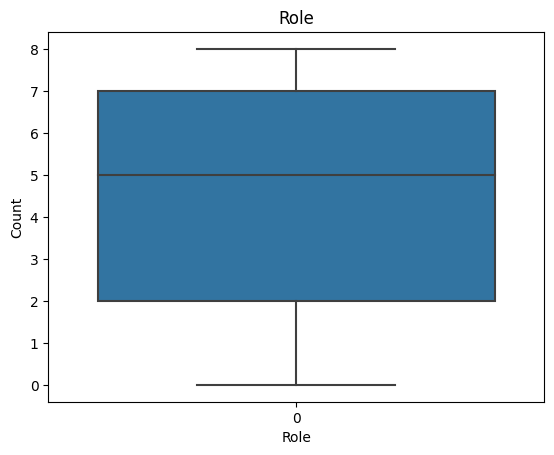

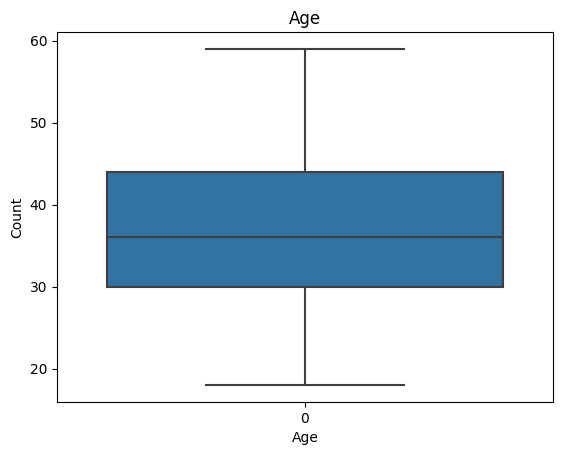

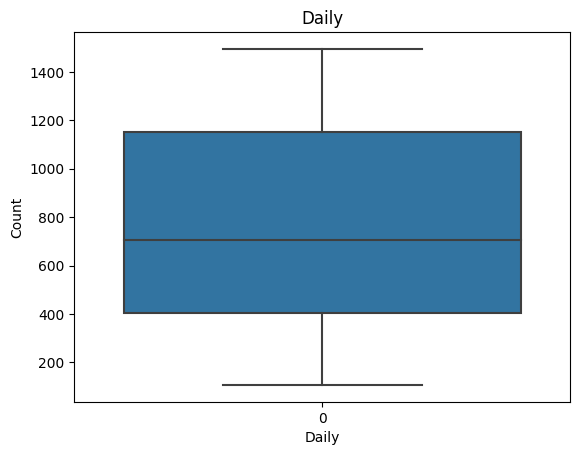

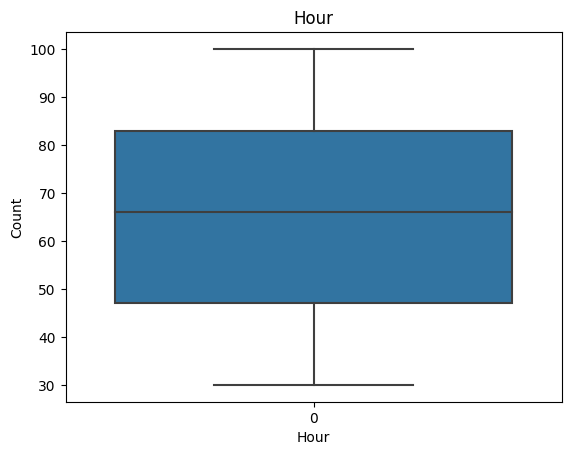

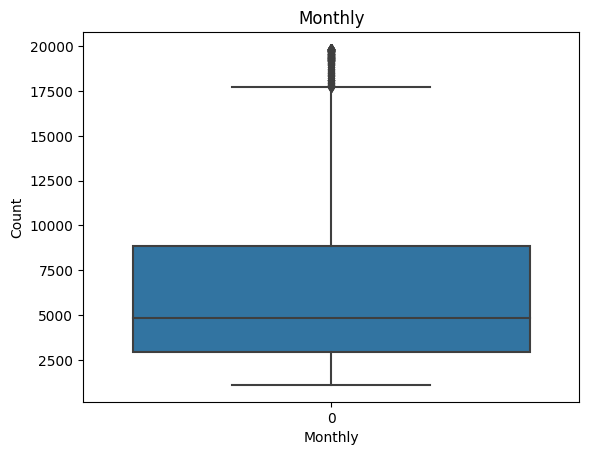

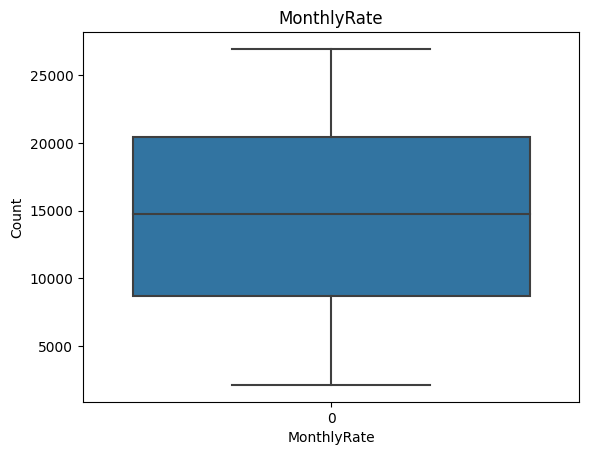

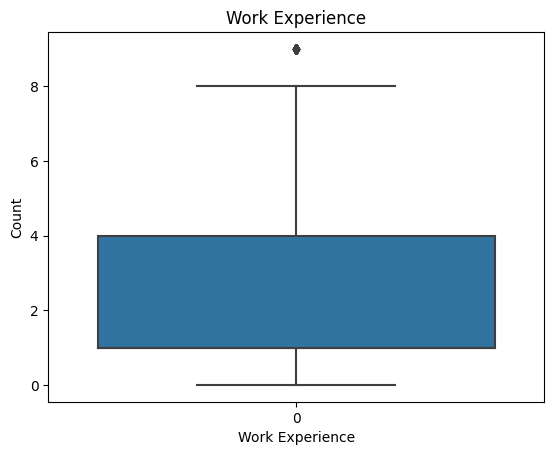

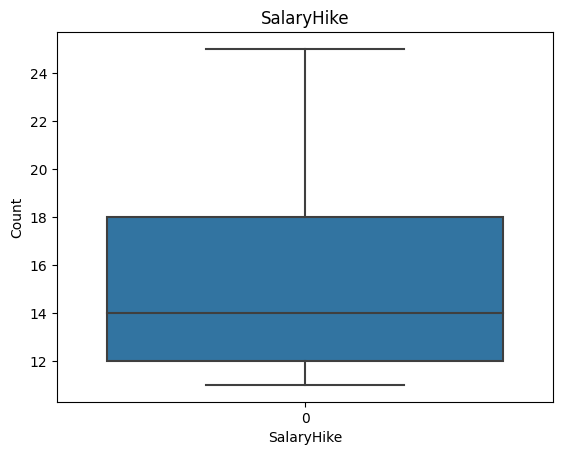

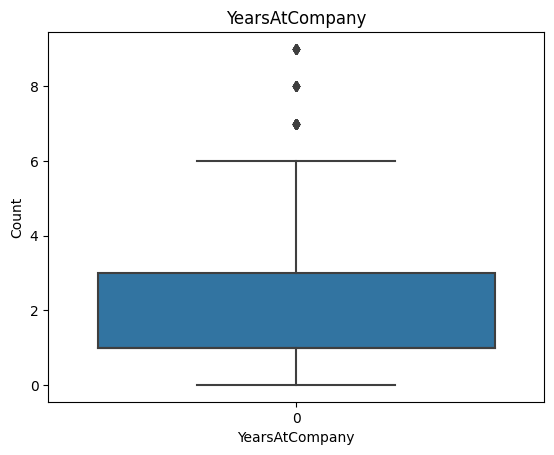

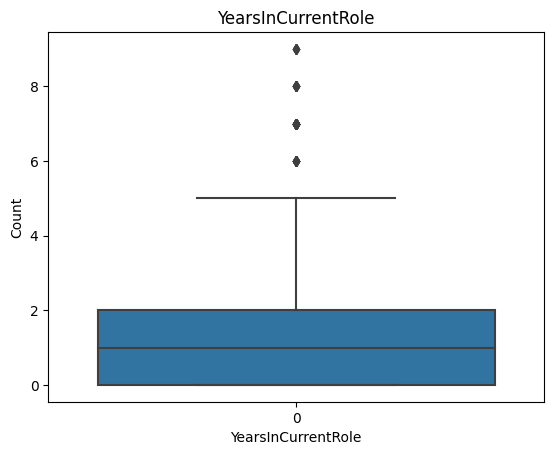

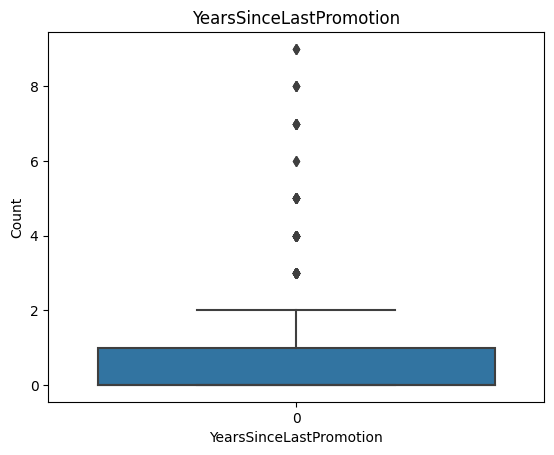

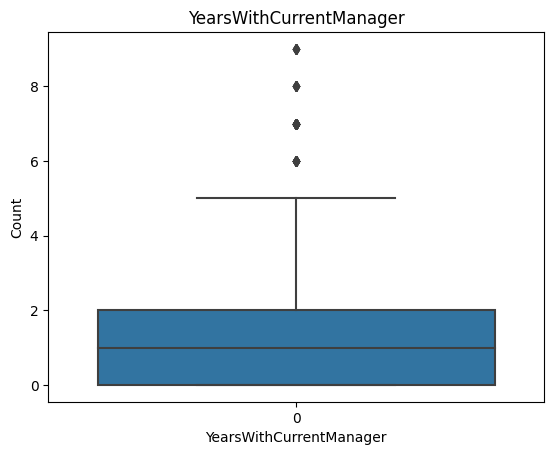

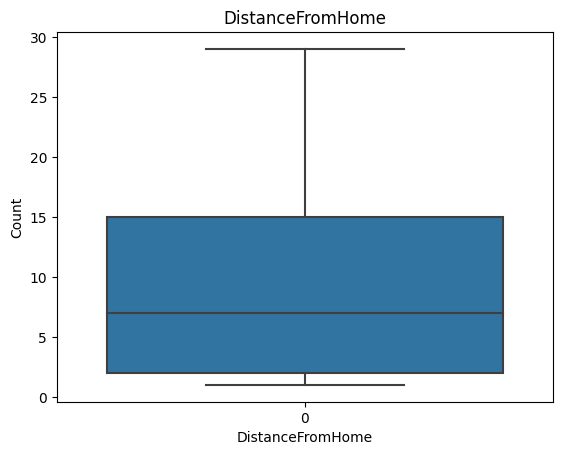

In [183]:
for feature in cont_features:
    sns.boxplot(df[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

## Bivariate analysis

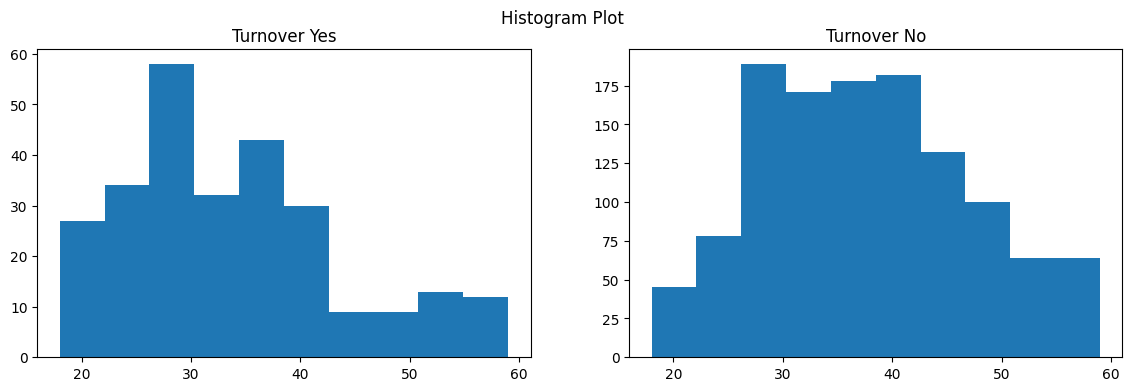

In [180]:

age1 = df.loc[df['Turnover'] == 1, 'Age']
age2 = df.loc[df['Turnover'] == 0,'Age']

fig, axs = plt.subplots(1,2, figsize = (14,4))
fig.suptitle('Histogram Plot')
axs[0].hist(age1)
axs[0].title.set_text('Turnover Yes')
axs[1].hist(age2)
axs[1].title.set_text('Turnover No')

analysis - Turnover rate start decreasing after 30 years 

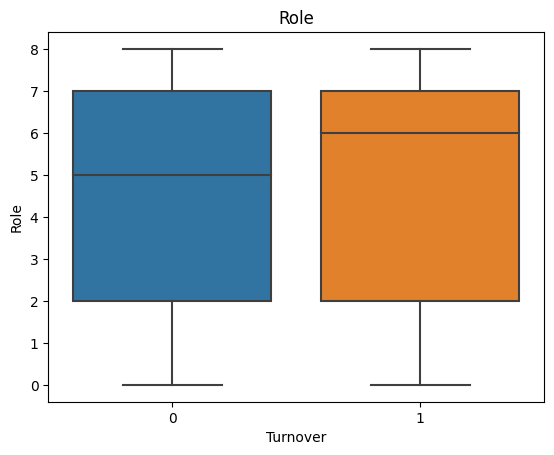

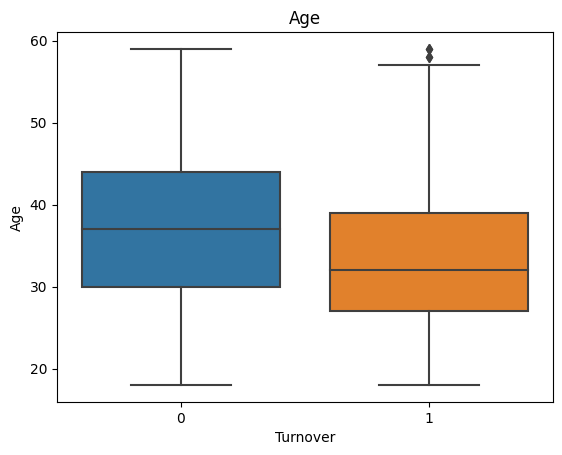

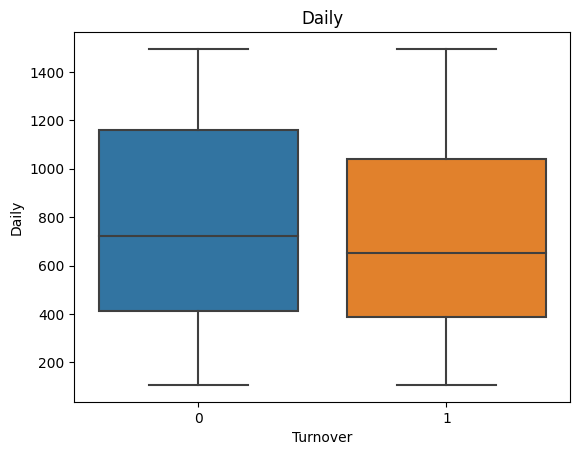

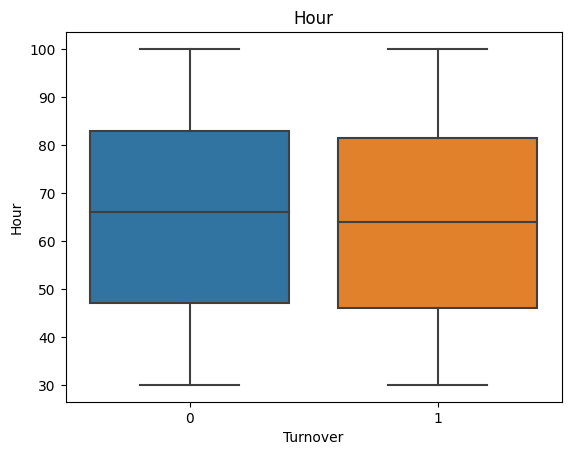

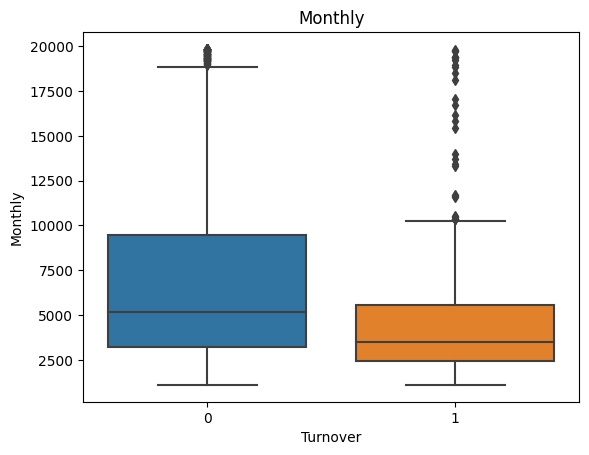

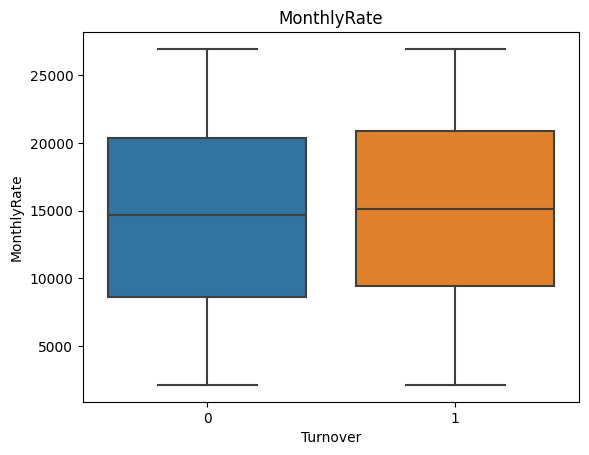

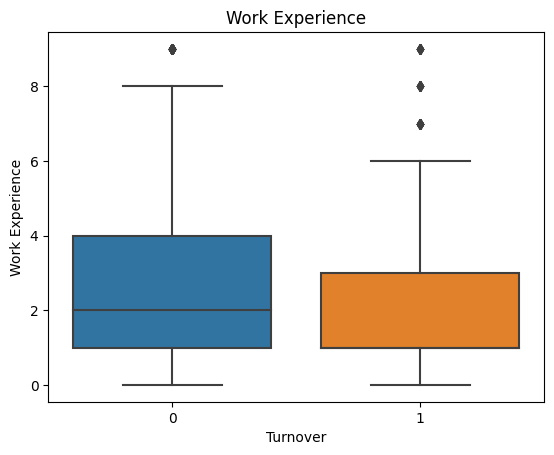

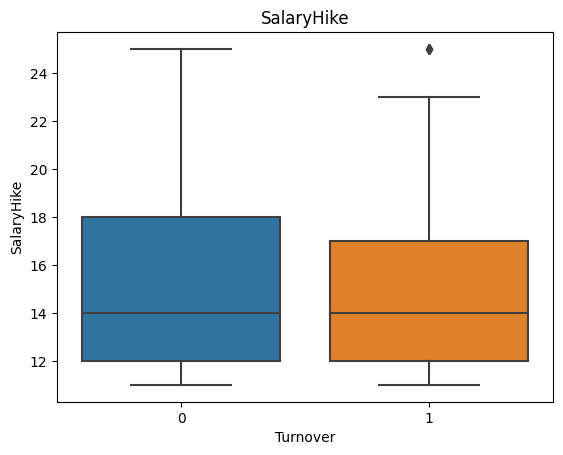

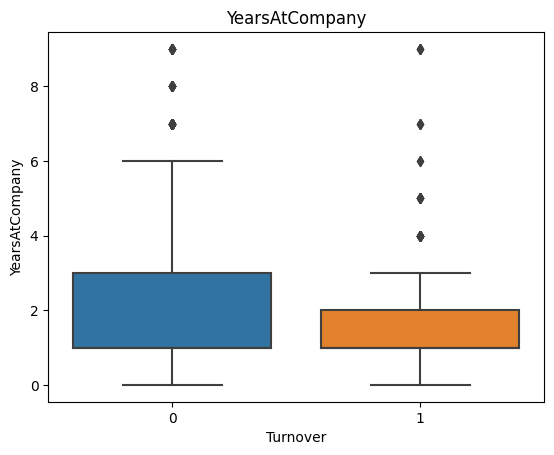

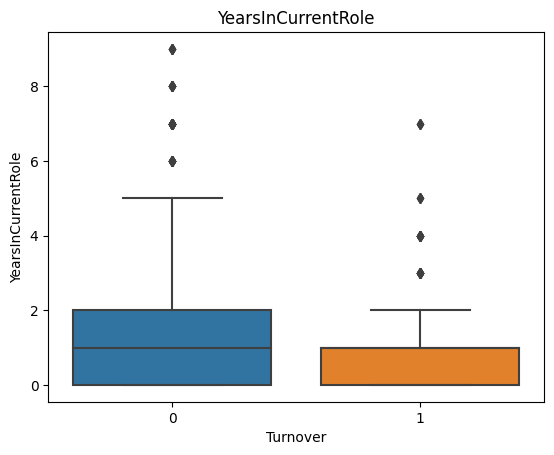

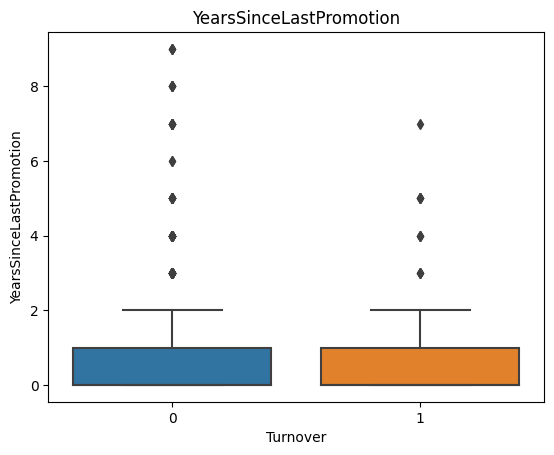

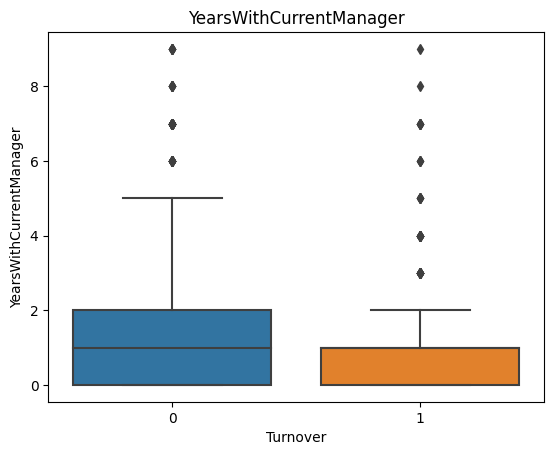

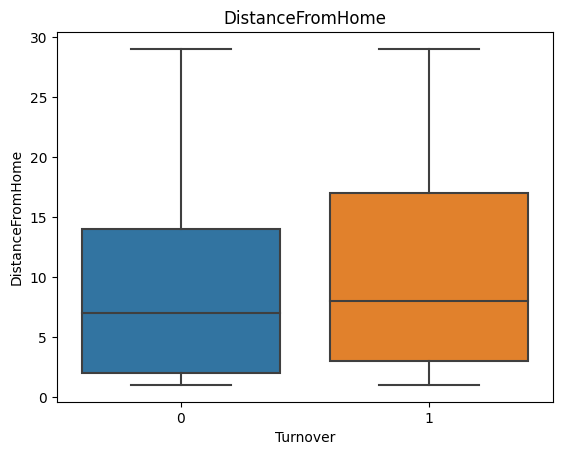

In [181]:
for feature in cont_features:
    sns.boxplot(df,x=df['Turnover'],y=feature)
    plt.title(feature)
    plt.show()


In [184]:
df.to_csv('processed_data_Ideaspice.csv')